# AIRBNB MADRID
1. Preprocesar el fichero de alojamientos para crear un data frame con las variables ```id, host_id, listing_url, room_type, neighbourhood_group_cleansed, price, cleaning_fee, accommodates, minimum_nights, minimum_cost, review_scores_rating, latitude, longitude, is_location_exact```. Eliminar del data frame cualquier fila incompleta. Añadir al data frame nuevas variables con el coste mínimo por noche y por persona (que incluya los gastos de limpieza).

2. Crear una función que reciba una lista de distritos y devuelva un diccionario con los tipos de alojamiento en ese distrito y el porcentaje de alojamientos de ese tipo.

3. Crear una función que reciba una lista de distritos y devuelva un diccionario con el número de alojamientos que cada anfitrión ofrece en esos distrito, ordenado de más a menos alojamientos.

4. Crear una función que reciba devuelva un diccionario con el número medio de alojamientos por anfitrión de cada distrito.

5. Crear una función que reciba una lista de distritos y dibuje un diagrama de sectores con los porcentajes de tipos de alojamientos en esos distritos.

6. Crear una función que dibuje un diagrama de barras con el número de alojamientos por distritos.

7. Crear una función que dibuje un diagrama de barras con los porcentajes acumulados de tipos de alojamientos por distritos.

8. Crear una función reciba una lista de distritos y una lista de tipos de alojamientos, y dibuje un diagrama de sectores con la distribución del número de alojamientos de ese tipo por anfitrión.

9. Crear una función que dibuje un diagrama de barras con los precios medios por persona y día de cada distrito.

10. Crear una función que reciba una lista de distritos y dibuje un gráfico de dispersión con el coste mínimo por noche y persona y la puntuación en esos distritos.

11. Crear una función que reciba una lista de distritos y dibuje dos histogramas con la distribución de precios por persona y día, uno para los alojamientos con título en inglés y otro para los alojamientos con títulos en español. Si la distribución es muy asimétrica, aplicar una transformación logarítmica. ¿Hay diferencias entre los precios de los alojamientos en inglés y el español? Nota: Para identificar el idioma puede usare el módulo langdetect.

## Importaciones necesarias

In [2]:
! pip install langdetect

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import langdetect as ld
print('Setup complete')

Setup complete


## Paso 1: Preprocesamiento

Preprocesar el fichero de alojamientos para crear un data frame con las variables id, host_id, listing_url, room_type, neighbourhood_group_cleansed, price, cleaning_fee, accommodates, minimum_nights, minimum_cost, review_scores_rating, latitude, longitude, is_location_exact. Eliminar del data frame cualquier fila incompleta. Añadir al data frame nuevas variables con el coste mínimo por noche y por persona (que incluya los gastos de limpieza).

In [4]:
df = pd.read_csv('data/madrid-airbnb-listings-small.csv', sep = '	') #EXTRACCIÓN DEL CSV SEPARADO MEDIANTE VARIOS ESPACIOS

In [5]:
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20190919050215,2019-09-19,"Rooftop terrace room with ensuite bathroom, Airc.","Atico en la calle Principe de Vergara, con bañ...",BETTER THAN A HOTEL.Upscale neighboorhood (Met...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,none,Nice and definitely non touristic neighborhoo...,...,f,f,flexible,f,f,1,0,1,0,0.56
1,21853,https://www.airbnb.com/rooms/21853,20190919050215,2019-09-19,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,none,We live in a leafy neighbourhood with plenty o...,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,0.55


A continuación, seleccionamos las columnas necesarias:  
```id, host_id, listing_url, room_type, neighbourhood_group_cleansed, price, cleaning_fee, accommodates, minimum_nights, minimum_cost, review_scores_rating, latitude, longitude, is_location_exact```

In [6]:
df_airbnb = df[['id', 'host_id', 'listing_url', 'room_type', 'neighbourhood_group_cleansed', 'price', 'cleaning_fee', 'accommodates', 'minimum_nights', 'review_scores_rating', 'latitude', 'longitude', 'is_location_exact']].copy()


**ELIMINACIÓN DUPLICADOS/NULOS**

In [7]:
df_airbnb.dropna(inplace = True)

In [8]:
print('Sin nulos:', df_airbnb.shape[0])
print('Con nulos:',df.shape[0])
print('Hubo un total de', df.shape[0] - df_airbnb.shape[0], 'datos nulos')

Sin nulos: 806
Con nulos: 1000
Hubo un total de 194 datos nulos


In [9]:
duplicate_sum = df_airbnb.duplicated().sum()
if duplicate_sum > 0:
  print('Total de duplicados:', duplicate_sum)
else:
  print('No se encontraron duplicados')

No se encontraron duplicados


**CAMBIO DE DATOS**

In [10]:
df_airbnb.head()

,id,host_id,listing_url,room_type,neighbourhood_group_cleansed,price,cleaning_fee,accommodates,minimum_nights,review_scores_rating,latitude,longitude,is_location_exact
0,6369,13660,https://www.airbnb.com/rooms/6369,Private room,Chamartín,$70.00,$5.00,2,1,98.0,40.45628,-3.67763,t
2,24805,101471,https://www.airbnb.com/rooms/24805,Entire home/apt,Centro,$80.00,$30.00,3,5,100.0,40.42202,-3.70395,t
3,24836,101653,https://www.airbnb.com/rooms/24836,Entire home/apt,Centro,$115.00,$0.00,4,3,98.0,40.41995,-3.69764,f
4,26825,114340,https://www.airbnb.com/rooms/26825,Private room,Arganzuela,$25.00,$15.00,1,2,94.0,40.38985,-3.69011,t
9,62423,303845,https://www.airbnb.com/rooms/62423,Private room,Centro,$45.00,$22.00,3,1,90.0,40.42080,-3.69878,t


In [11]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            806 non-null    int64  
 1   host_id                       806 non-null    int64  
 2   listing_url                   806 non-null    object 
 3   room_type                     806 non-null    object 
 4   neighbourhood_group_cleansed  806 non-null    object 
 5   price                         806 non-null    object 
 6   cleaning_fee                  806 non-null    object 
 7   accommodates                  806 non-null    int64  
 8   minimum_nights                806 non-null    int64  
 9   review_scores_rating          806 non-null    float64
 10  latitude                      806 non-null    float64
 11  longitude                     806 non-null    float64
 12  is_location_exact             806 non-null    object 
dtypes: fl

- Unidades monetarias

In [12]:
for i in ['price', 'cleaning_fee']:
    df_airbnb[i] = df_airbnb[i].str.replace('$', '').str.replace(',','').astype(float)

C:\Users\mgonzgarc\AppData\Local\Temp\ipykernel_14508\2176319446.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_airbnb[i] = df_airbnb[i].str.replace('$', '').str.replace(',','').astype(float)


**CREACIÓN DEL MINÍMO COSTE Y MINIMO COSTE/PERSONA**

In [13]:
df_airbnb['minimum_cost'] = df_airbnb['price'] + df_airbnb['cleaning_fee']

df_airbnb['minimum_cost_per_night_and_person'] = round((df_airbnb['minimum_cost']/df['minimum_nights']) / df['accommodates'], 2)


In [14]:
df_airbnb.head()

,id,host_id,listing_url,room_type,neighbourhood_group_cleansed,price,cleaning_fee,accommodates,minimum_nights,review_scores_rating,latitude,longitude,is_location_exact,minimum_cost,minimum_cost_per_night_and_person
0,6369,13660,https://www.airbnb.com/rooms/6369,Private room,Chamartín,70.0,5.0,2,1,98.0,40.45628,-3.67763,t,75.0,37.50
2,24805,101471,https://www.airbnb.com/rooms/24805,Entire home/apt,Centro,80.0,30.0,3,5,100.0,40.42202,-3.70395,t,110.0,7.33
3,24836,101653,https://www.airbnb.com/rooms/24836,Entire home/apt,Centro,115.0,0.0,4,3,98.0,40.41995,-3.69764,f,115.0,9.58
4,26825,114340,https://www.airbnb.com/rooms/26825,Private room,Arganzuela,25.0,15.0,1,2,94.0,40.38985,-3.69011,t,40.0,20.00
9,62423,303845,https://www.airbnb.com/rooms/62423,Private room,Centro,45.0,22.0,3,1,90.0,40.42080,-3.69878,t,67.0,22.33


## Paso 2: Distritos y porcentajes

Crear una función que reciba una lista de distritos y devuelva un diccionario con los tipos de alojamiento en ese distrito y el porcentaje de alojamientos de ese tipo.

Para ello creamos una función que reciba como parámetros el dataset seleccionado y la lista con los distritos seleccionados. Primeramente se seleccionarán unicamente las filas que contengan en la columna de el distrito, el distritos puestos en la lista. A continuación, agrupa todos los tipos de habitación y los suma, transformándolos en un diccionario. Para el cálculo del porcentaje necesitamos sumar todos los alojamientos y dividirlos al número de habitaciones de cada tipo. Esto deberá de estar dentro de un bucle for con la intención de que dentro del diccionario resultado se metan los diccionarios con los porcentajes de cada distrito.

In [15]:
def alojamiento_distrito(df, distritos):
    alojamiento_porcentaje = {}
    for distrito in distritos:
      df_1 = df[df['neighbourhood_group_cleansed'] == distrito]
      alojamiento_distrito = df_1.groupby('room_type').size().to_dict()
      total_alojamientos = sum(alojamiento_distrito.values())
      alojamiento_porcentaje[distrito] = {}
      for key, i in alojamiento_distrito.items():
          porcentaje = i / total_alojamientos
          alojamiento_porcentaje[distrito][key] = round(porcentaje * 100, 2)
    return alojamiento_porcentaje


**EJEMPLO**

In [16]:
print(alojamiento_distrito(df_airbnb, ['Chamartín','Arganzuela']))

{'Chamartín': {'Entire home/apt': 64.29, 'Private room': 35.71}, 'Arganzuela': {'Entire home/apt': 67.74, 'Private room': 32.26}}


## Paso 3: Distritos y total alojamientos





Crear una función que reciba una lista de distritos y devuelva un diccionario con el número de alojamientos que cada anfitrión ofrece en esos distrito, ordenado de más a menos alojamientos.


Como hicimos en el ejercicio anterior hemos realizado un bucle for para poner los distintos valores en un diccionario de diccionarios según el distrito. Primero se seleccionarán unicamente las filas que contengan en la columna de el distrito, el distritos puestos en la lista. A continuación, agrupa todos los tipos de habitación y los ordena.

In [17]:
def alojamientos_numero(df, distritos):
  sorted_alojamiento_distrito = {}
  for distrito in distritos:
      df_1 = df[df['neighbourhood_group_cleansed'] == distrito]
      alojamiento_distrito = df_1.groupby('room_type').size().to_dict()
      sorted_alojamiento_distrito[distrito] = {key:alojamiento_distrito[key] for key in alojamiento_distrito}
  return sorted_alojamiento_distrito


In [18]:
print(alojamientos_numero(df_airbnb, ['Chamartín','Arganzuela', 'Centro']))

{'Chamartín': {'Entire home/apt': 9, 'Private room': 5}, 'Arganzuela': {'Entire home/apt': 21, 'Private room': 10}, 'Centro': {'Entire home/apt': 431, 'Hotel room': 8, 'Private room': 88, 'Shared room': 4}}


## Paso 4: Media de alojamientos

Crear una función que reciba una lista de distritos y devuelva un diccionario con el número medio de alojamientos por anfitrión de cada distrito.


In [19]:
def media_alojamientos_por_anfitrion(df):
    promedio_por_anfitrion = df.groupby('neighbourhood_group_cleansed')['host_id'].nunique() / df.groupby('neighbourhood_group_cleansed')['id'].count()
    return promedio_por_anfitrion.to_dict()

In [20]:
promedio_alojamientos = media_alojamientos_por_anfitrion(df_airbnb)
print(promedio_alojamientos)

{'Arganzuela': 0.9354838709677419, 'Barajas': 1.0, 'Carabanchel': 0.875, 'Centro': 0.6685499058380414, 'Chamartín': 1.0, 'Chamberí': 0.8301886792452831, 'Ciudad Lineal': 0.7857142857142857, 'Fuencarral - El Pardo': 1.0, 'Hortaleza': 0.8888888888888888, 'Latina': 0.9285714285714286, 'Moncloa - Aravaca': 0.9375, 'Moratalaz': 0.6666666666666666, 'Puente de Vallecas': 0.8333333333333334, 'Retiro': 0.8571428571428571, 'Salamanca': 0.8064516129032258, 'San Blas - Canillejas': 0.6363636363636364, 'Tetuán': 0.8235294117647058, 'Usera': 0.6666666666666666, 'Vicálvaro': 1.0, 'Villa de Vallecas': 1.0, 'Villaverde': 0.75}


##Paso 5: Diagrama con porcentajes de tipos de alojamientos

Crear una función que reciba una lista de distritos y dibuje un diagrama de sectores con los porcentajes de tipos de alojamientos en esos distritos.

In [21]:
def diagrama_sectores_tipos_alojamientos(alojamientos, distritos):
    alojamientos_distritos = alojamientos[alojamientos['neighbourhood_group_cleansed'].isin(distritos)]
    tipos_alojamiento = alojamientos_distritos['room_type'].value_counts(normalize=True)
    plt.pie(tipos_alojamiento, labels=tipos_alojamiento.index, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title('Distribución de Tipos de Alojamientos en los Distritos')
    plt.savefig('gráficas/tipos_alojamientos.png')
    plt.show()

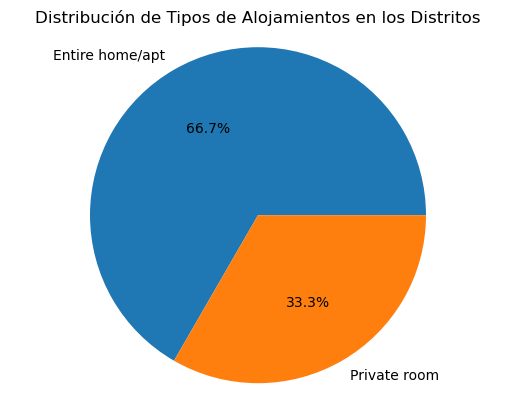

In [22]:
diagrama_sectores_tipos_alojamientos(df_airbnb, ['Chamartín', 'Arganzuela'])

##Paso 6: Diagrama de barras número alojamientos

Crear una función que dibuje un diagrama de barras con el número de alojamientos por distritos.

In [23]:
def diagrama_barras_alojamientos_por_distrito(df):
    alojamientos_por_distrito = df['neighbourhood_group_cleansed'].value_counts()
    alojamientos_por_distrito.plot(kind='bar')
    plt.xlabel('Distrito')
    plt.ylabel('Número de Alojamientos')
    plt.title('Número de Alojamientos por Distrito')
    plt.savefig('gráficas/alojamientos_por_distrito.png')
    plt.show()

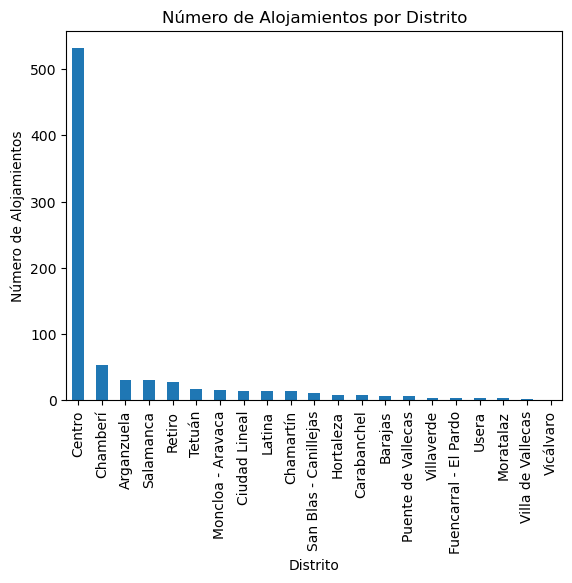

In [24]:
diagrama_barras_alojamientos_por_distrito(df_airbnb)

## Paso 7: Diagrama tipo alojamiento por distrito
Crear una función que dibuje un diagrama de barras con los porcentajes acumulados de tipos de alojamientos por distritos.


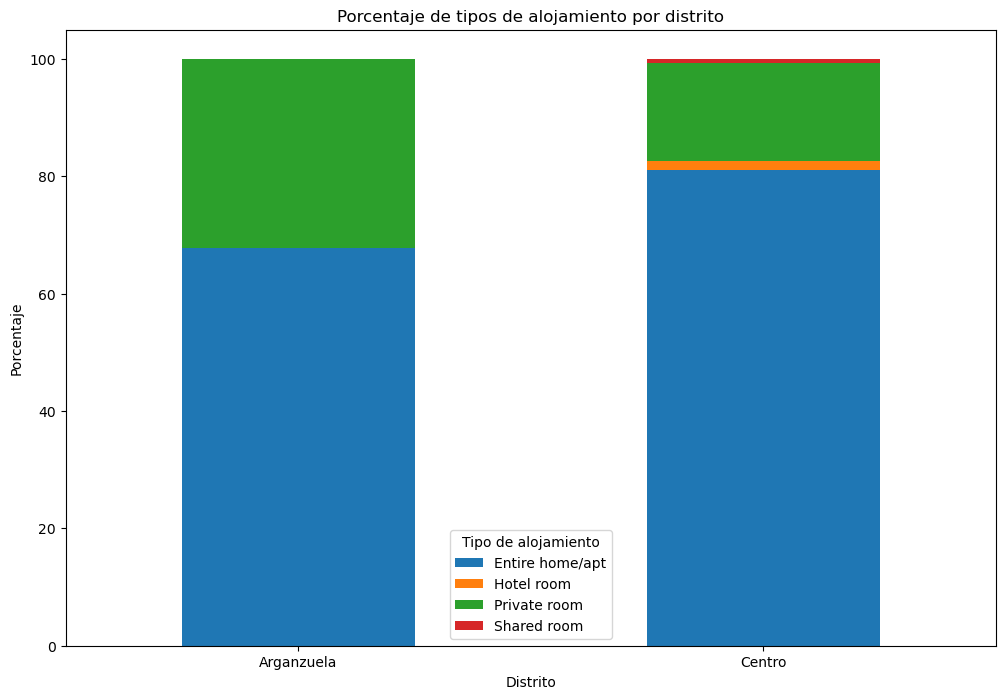

In [25]:
def diagrama_porcentaje_tipo_alojamiento(df, distritos):
    # cogemos solo los alojamientos en esos distritos
    df_distr = df[df["neighbourhood_group_cleansed"].isin(distritos)]
    
    # agrupamos los datos por distrito y tipo de alojamiento
    tipos_aloj_por_distrito = df_distr.groupby(["neighbourhood_group_cleansed", "room_type"])['id'].count()
    
    # porcentaje de cada tipo de alojamiento para cada distrito
    porcentaje = tipos_aloj_por_distrito.groupby(level=0).apply(lambda x: 100 * x / x.sum())
    df_porcentaje = porcentaje.unstack()
    
    # Representcación del diagrama de barras
    ax = df_porcentaje.plot(kind="bar", stacked=True, figsize=(12, 8), rot=0)
    ax.set_title("Porcentaje de tipos de alojamiento por distrito")
    ax.set_xlabel("Distrito")
    ax.set_ylabel("Porcentaje")
    plt.legend(title="Tipo de alojamiento")
    plt.savefig('gráficas/porcentaje_tipo_alojamiento.png')
    plt.show()


#------------------------------------------------------------------------
diagrama_porcentaje_tipo_alojamiento(df_airbnb, ["Centro", "Arganzuela"])

## Paso 8: Diagrama de alojamientos por anfitrión
Crear una función reciba una lista de distritos y una lista de tipos de alojamientos, y dibuje un diagrama de sectores con la distribución del número de alojamientos de ese tipo por anfitrión.

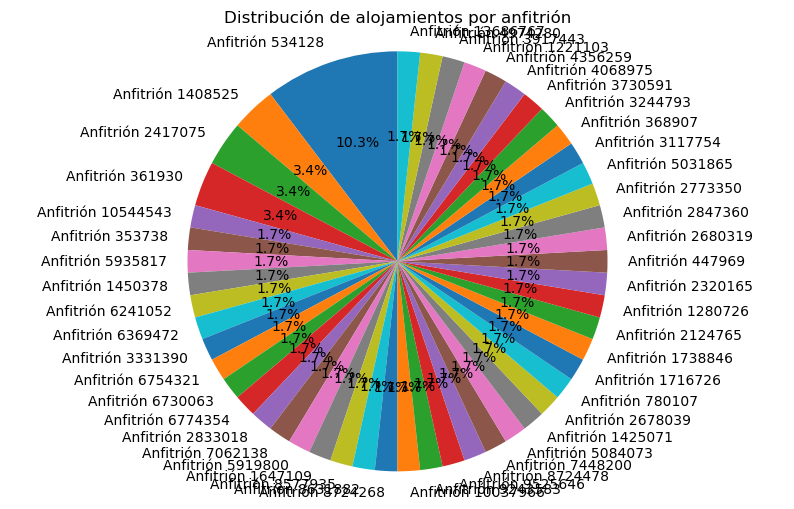

In [26]:
def diagrama_alojamientos_por_anfitrion(distritos, tipos_alojamientos, df):
    # FILTRAR LOS ALOJAMIETOS: DISTRITO; TIPO
    df_filtrados = df[df['neighbourhood_group_cleansed'].isin(distritos) & df['room_type'].isin(tipos_alojamientos)]

    anfitriones = df_filtrados['host_id'].value_counts() # Nº DE ANFITRIONES

    labels = [f"Anfitrión {anfitrion}" for anfitrion in anfitriones.index] #
    sizes = anfitriones.values 

    # GRÁFICA
    fig, ax = plt.subplots(figsize=(10,6))
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title('Distribución de alojamientos por anfitrión')
    plt.savefig('gráficas/alojamientos_por_anfitrion.png')
    plt.show()
#---------------------------
distritos = ['Chamberí', 'Arganzuela']
tipos = ['Entire home/apt']
diagrama_alojamientos_por_anfitrion(distritos, tipos, df_airbnb)

## Paso 9: Diagrama precio medio por persona y día
Crear una función que dibuje un diagrama de barras con los precios medios por persona y día de cada distrito.

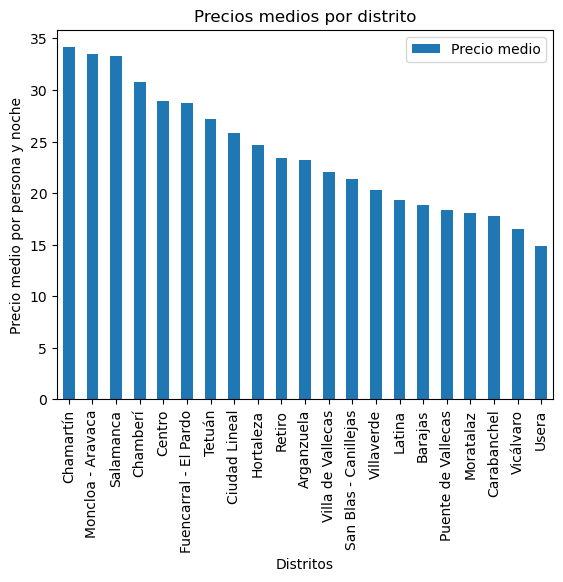

In [27]:
def diagrama_precios_medios(df):
    precios = {} # vamos a crear un diccionario de {distrito:precio_medio]}
    lista_distritos = df_airbnb['neighbourhood_group_cleansed'].unique().tolist()
    for distrito in lista_distritos: # para cada distrito
        # obtenemos el precio total por persona y día (teniendo en cuenta el plus de limpieza)
        df_distrito = df[df['neighbourhood_group_cleansed'] == distrito]
        num_personas = df_distrito['accommodates']
        num_noches = df_distrito['minimum_nights']
        precio_total = df_distrito['price']*num_noches + df_distrito['cleaning_fee'].fillna(0)
        precio_persona_noche = precio_total / (num_personas*num_noches)
        precio_medio = precio_persona_noche.mean()
        precios[distrito] = precio_medio # lo añadimos al diccionario
    
    # creamos un dataframe a partir del diccionario
    df_precios = pd.DataFrame.from_dict(precios, orient='index', columns=['Precio medio'])
    #lo ordenamos por orden desdendente de precio
    df_precios = df_precios.sort_values('Precio medio', ascending=False)

    # y representamos el histograma
    df_precios.plot(kind='bar', rot=90)
    plt.xlabel('Distritos')
    plt.ylabel('Precio medio por persona y noche')
    plt.title('Precios medios por distrito')
    plt.savefig('gráficas/precios_medios.png')
    plt.show()


#------------------------------------------------------------------------
diagrama_precios_medios(df_airbnb)

## Paso 10: Diagrama de dispersión con coste mínimo por noche y persona

Crear una función que reciba una lista de distritos y dibuje un gráfico de dispersión con el coste mínimo por noche y persona y la puntuación en esos distritos.


In [28]:
def precios_puntuacion_distritos(distritos, df):
    """
    Función que dibuja un diagrama de dispersión con el precio por noche y persona y la puntuación en unos distritos dados.

    Parámetros:
    - distritos: Es una lista con los nombres de los distritos.
    - df: Es el DataFrame que contiene los datos de los alojamientos.
    """
    df_distr = df[df["neighbourhood_group_cleansed"].isin(distritos)]

    # Filtramos los alojamientos en los distritos especificados
    alojamientos_filtrados = df_distr.copy()

    # Calculamos el precio por noche y persona
    alojamientos_filtrados['minimum_cost_per_night_and_person'] = ((alojamientos_filtrados['price'] * alojamientos_filtrados['minimum_nights']) + alojamientos_filtrados['cleaning_fee'])/(alojamientos_filtrados['minimum_nights'] + alojamientos_filtrados['accommodates'])
    
    # Dibujamos el diagrama de dispersión
    fig, ax = plt.subplots()
    ax.scatter(alojamientos_filtrados['minimum_cost_per_night_and_person'], alojamientos_filtrados['review_scores_rating'])
    
    # Ponemos el título y las etiquetas de los ejes
    ax.set_title('Precios vs Puntuación\nDistritos de ' + ', '.join(distritos), loc="center", fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:blue'})
    ax.set_xlabel('Precio en €')
    ax.set_ylabel('Puntuación')
    plt.show()

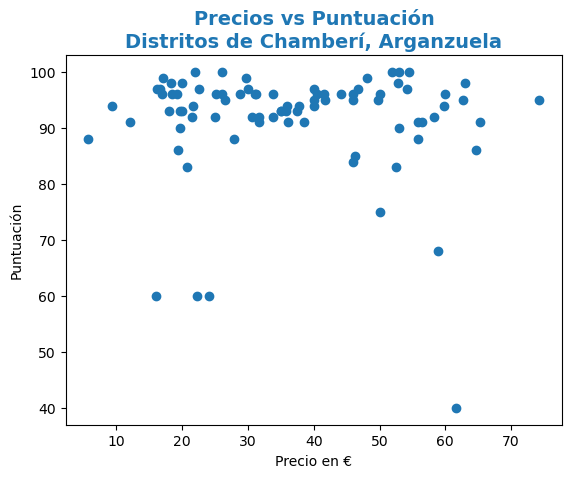

<Figure size 640x480 with 0 Axes>

In [29]:
precios_puntuacion_distritos(distritos, df_airbnb)
plt.savefig('gráficas/precios_puntuacion_distritos.png')

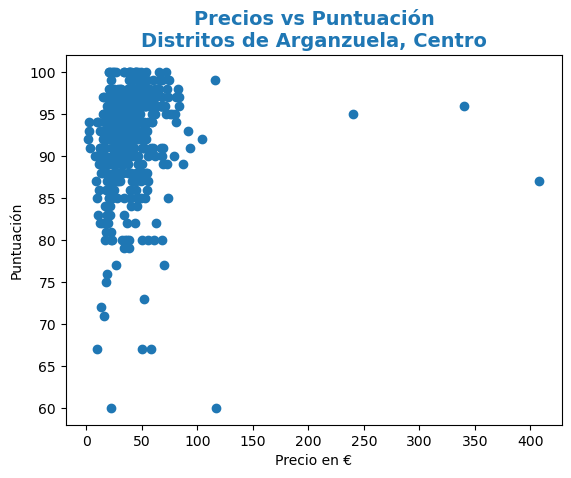

<Figure size 640x480 with 0 Axes>

In [30]:
precios_puntuacion_distritos(['Arganzuela', 'Centro'],df_airbnb)
plt.savefig('gráficas/precios_puntuacion_distritos_2.png')

## Paso 11: Histograma de precio según persona y día

Crear una función que reciba una lista de distritos y dibuje dos histogramas con la distribución de precios por persona y día, uno para los alojamientos con título en inglés y otro para los alojamientos con títulos en español. Si la distribución es muy asimétrica, aplicar una transformación logarítmica. ¿Hay diferencias entre los precios de los alojamientos en inglés y el español? Nota: Para identificar el idioma puede usare el módulo langdetect.

In [31]:
df_airbnb2 = df_airbnb.copy()

Añadimos al dataframe la columna de name del original para poder diferenciar la lengua

In [32]:
df_airbnb2 = df_airbnb2.assign(description = df['description'])

In [33]:
def detect_language(text):
    if not text.strip():
        return None
    return ld.detect(text)


def precios_distritos(distritos, df):
    """
    Función que dibuja dos histogramas con la distribución de precios por persona en unos distritos dados.
    Parámetros:
    - alojamientos: Es una lista de diccionarios, donde cada diccionario contiene los datos de un alojamiento.
    - distritos: Es una lista con los nombres de los distritos.
    """
    df_distr = df[df["neighbourhood_group_cleansed"].isin(distritos)]
    
    df['language'] = df['description'].apply(detect_language)

    # Use lambda functions to create two lists with the English and Spanish text
    alojamientos_ingles = df[df['language'] == 'en']
    alojamientos_espanol = df[df['language'] == 'es']

    # Dibujamos los histogramas
    fig, axs = plt.subplots(1, 2, sharey=True)
    axs[0].hist(alojamientos_ingles['minimum_cost_per_night_and_person'], bins=20)
    axs[1].hist(alojamientos_espanol['minimum_cost_per_night_and_person'], bins=20)
    
    # Ponemos el título y las etiquetas de los ejes
    axs[0].set_title("Precios en inglés")
    axs[1].set_title("Precios en español")
    axs[0].set_xlabel("Precio en €")
    axs[1].set_xlabel("Precio en €")
    axs[0].set_ylabel("Frecuencia")
    plt.savefig('gráficas/precios_distritos.png')
    plt.show()
    # Guardamos el gráfico.
    return

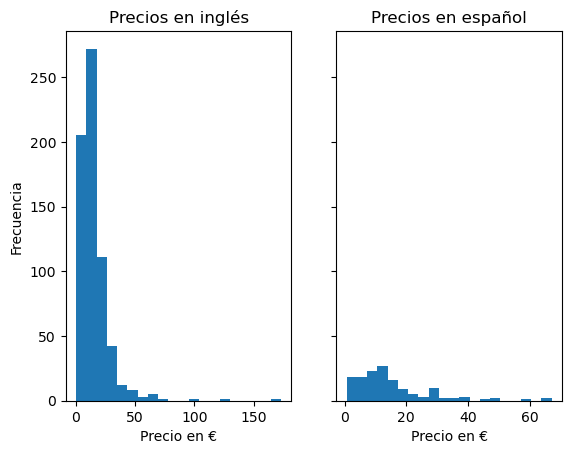

In [34]:
precios_distritos(distritos, df_airbnb2)

La diferencia es que hay muchos mas alojamientos en ingles que en español y que los alojamientos que cuestan más estan en los ingleses